### Import pandas and read in the csv file and set it to a dataframe called baskets

In [1]:
import pandas as pd
import numpy as np

### read in data, make columns for date, year, month, day, hour, weekday, from the "placed_at" column 

In [2]:
filename = './AwanTunai_transaction_data.csv'
baskets = pd.read_csv(filename)

 - more inspection on the data

In [3]:
baskets.describe()

,id,order_id,merchant_id,sku_id,top_cat,sub_cat,qty,price
count,492437.000000,492437.000000,492437.000000,492437.000000,491449.000000,491449.000000,492437.000000,4.924370e+05
mean,246219.000000,25313.575371,143.411031,1080.489256,21.282263,67.775401,3.059088,1.131020e+05
std,142154.461592,15459.726935,82.515747,387.372125,7.735270,28.466744,17.958188,1.923181e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,123110.000000,11579.000000,61.000000,873.000000,15.000000,45.000000,1.000000,1.910000e+04
50%,246219.000000,24300.000000,164.000000,1025.000000,27.000000,86.000000,1.000000,7.650000e+04
75%,369328.000000,38773.000000,191.000000,1400.000000,27.000000,86.000000,3.000000,1.720000e+05
max,492437.000000,53438.000000,357.000000,1860.000000,35.000000,108.000000,6000.000000,4.240000e+06


 - change the number of digits in the display

In [4]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
baskets.describe()

,id,order_id,merchant_id,sku_id,top_cat,sub_cat,qty,price
count,492437,492437,492437,492437,491449,491449,492437,492437
mean,246219,25314,143,1080,21,68,3,113102
std,142154,15460,83,387,8,28,18,192318
min,1,1,1,1,1,1,1,1
25%,123110,11579,61,873,15,45,1,19100
50%,246219,24300,164,1025,27,86,1,76500
75%,369328,38773,191,1400,27,86,3,172000
max,492437,53438,357,1860,35,108,6000,4240000


 - Simple summaries on data from one dimension: price

In [5]:
baskets.price.describe()

count    492437
mean     113102
std      192318
min           1
25%       19100
50%       76500
75%      172000
max     4240000
Name: price, dtype: float64

In [6]:
baskets.iloc[:3]

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
0,1,1,2021-06-17 14:00:31.373,9,10,27,86,2,343000
1,2,1,2021-06-17 14:00:31.373,9,6,27,86,1,159000
2,3,1,2021-06-17 14:00:31.373,9,14,27,86,2,225000


In [7]:
baskets.iloc[[0,2]]

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
0,1,1,2021-06-17 14:00:31.373,9,10,27,86,2,343000
2,3,1,2021-06-17 14:00:31.373,9,14,27,86,2,225000


In [8]:
baskets.iloc[:,3]

0           9
1           9
2           9
3           9
4          10
         ... 
492432    184
492433    184
492434    184
492435    184
492436    184
Name: merchant_id, Length: 492437, dtype: int64

In [9]:
baskets.iloc[:,[3,8]]

,merchant_id,price
0,9,343000
1,9,159000
2,9,225000
3,9,246000
4,10,19500
...,...,...
492432,184,21000
492433,184,38000
492434,184,274000
492435,184,19400


In [10]:
baskets.loc[:,'merchant_id']

0           9
1           9
2           9
3           9
4          10
         ... 
492432    184
492433    184
492434    184
492435    184
492436    184
Name: merchant_id, Length: 492437, dtype: int64

In [11]:
baskets.loc[:,['merchant_id']]

,merchant_id
0,9
1,9
2,9
3,9
4,10
...,...
492432,184
492433,184
492434,184
492435,184


In [12]:
baskets.loc[:,['merchant_id', 'price']]

,merchant_id,price
0,9,343000
1,9,159000
2,9,225000
3,9,246000
4,10,19500
...,...,...
492432,184,21000
492433,184,38000
492434,184,274000
492435,184,19400


In [13]:
baskets[['merchant_id','price']]

,merchant_id,price
0,9,343000
1,9,159000
2,9,225000
3,9,246000
4,10,19500
...,...,...
492432,184,21000
492433,184,38000
492434,184,274000
492435,184,19400


In [14]:
baskets.iloc[lambda x: x.index % 2 == 0]

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
0,1,1,2021-06-17 14:00:31.373,9,10,27,86,2,343000
2,3,1,2021-06-17 14:00:31.373,9,14,27,86,2,225000
4,5,2,2021-06-17 14:29:31.918,10,15,27,86,5,19500
6,7,3,2021-06-17 15:06:17.597,11,11,27,86,2,68500
8,9,3,2021-06-17 15:06:17.597,11,27,27,86,2,116000
...,...,...,...,...,...,...,...,...,...
492428,492429,53437,2022-12-31 18:03:08.531,287,1339,12,18,2,163000
492430,492431,53438,2022-12-31 18:14:45.659,184,973,27,86,1,79000
492432,492433,53438,2022-12-31 18:14:45.659,184,1500,27,86,5,21000
492434,492435,53438,2022-12-31 18:14:45.659,184,1504,27,86,1,274000


In [15]:
baskets[baskets['price'] > 4200000]

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
477081,477116,51563,2022-12-17 11:36:20.016,191,987,27,86,1,4210000
478374,478383,51691,2022-12-18 10:36:08.589,355,970,27,86,1,4220000
482817,482819,52262,2022-12-22 14:39:52.383,355,970,27,86,1,4240000
486896,486931,52741,2022-12-26 13:01:10.968,161,970,27,86,2,4240000


 - save some data to a file

In [16]:
baskets[baskets['merchant_id'] == 48].to_csv("test_data_ignore.csv", sep = ",", index=False)

### continue the inspection from last notebook
 - what is behind the extreme high or extreme low price?

In [17]:
baskets[(baskets.price == 1) | (baskets.price == 4240000)] # parenthesis is needed

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
29328,29342,3207,2021-09-29 11:49:17.746,23,233,14,34,1,1
29329,29343,3207,2021-09-29 11:49:17.746,23,186,27,86,1,1
482817,482819,52262,2022-12-22 14:39:52.383,355,970,27,86,1,4240000
486896,486931,52741,2022-12-26 13:01:10.968,161,970,27,86,2,4240000


 - another way that could be easier for writing query

In [18]:
baskets.query("price == 1 or price == 4240000")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
29328,29342,3207,2021-09-29 11:49:17.746,23,233,14,34,1,1
29329,29343,3207,2021-09-29 11:49:17.746,23,186,27,86,1,1
482817,482819,52262,2022-12-22 14:39:52.383,355,970,27,86,1,4240000
486896,486931,52741,2022-12-26 13:01:10.968,161,970,27,86,2,4240000


 - top level category 27 is cigarette, 14 is powder drink 
 - let's look at merchant 23

In [19]:
baskets[baskets.merchant_id == 23]

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
29328,29342,3207,2021-09-29 11:49:17.746,23,233,14,34,1,1
29329,29343,3207,2021-09-29 11:49:17.746,23,186,27,86,1,1
136026,136065,12832,2022-01-19 08:51:11.623,23,1388,12,83,1,5000
274710,274719,27525,2022-06-09 16:21:53.321,23,1149,15,50,1,95000
386634,386636,40813,2022-09-25 11:56:44.838,23,1545,5,27,2,17500
386635,386637,40813,2022-09-25 11:56:44.838,23,1219,27,86,4,33400
386636,386638,40813,2022-09-25 11:56:44.838,23,1085,14,34,10,12000
386637,386639,40813,2022-09-25 11:56:44.838,23,995,12,92,1,72000
386638,386640,40813,2022-09-25 11:56:44.838,23,971,27,86,10,20200
386639,386641,40813,2022-09-25 11:56:44.838,23,989,27,86,1,200000


 - hmm, only two real transactions, three months apart
 - let's look at the items purchased, sort by sku_id so that we can check repeat purchase?

In [20]:
baskets[baskets.merchant_id == 23].sort_values("sku_id")

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
29329,29343,3207,2021-09-29 11:49:17.746,23,186,27,86,1,1
29328,29342,3207,2021-09-29 11:49:17.746,23,233,14,34,1,1
467584,467589,50434,2022-12-08 11:40:56.707,23,697,27,86,1,156000
467577,467582,50434,2022-12-08 11:40:56.707,23,748,10,11,1,68000
386640,386642,40813,2022-09-25 11:56:44.838,23,754,16,101,1,55000
386641,386643,40813,2022-09-25 11:56:44.838,23,867,27,86,1,200000
467585,467590,50434,2022-12-08 11:40:56.707,23,881,25,86,1,183500
386638,386640,40813,2022-09-25 11:56:44.838,23,971,27,86,10,20200
467582,467587,50434,2022-12-08 11:40:56.707,23,971,27,86,10,20700
467578,467583,50434,2022-12-08 11:40:56.707,23,973,27,86,1,76500


In [21]:
baskets[baskets.merchant_id == 23].sort_values(["top_cat", "sku_id"])

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
386643,386645,40813,2022-09-25 11:56:44.838,23,1281,5,86,4,30000
386634,386636,40813,2022-09-25 11:56:44.838,23,1545,5,27,2,17500
467577,467582,50434,2022-12-08 11:40:56.707,23,748,10,11,1,68000
386637,386639,40813,2022-09-25 11:56:44.838,23,995,12,92,1,72000
136026,136065,12832,2022-01-19 08:51:11.623,23,1388,12,83,1,5000
29328,29342,3207,2021-09-29 11:49:17.746,23,233,14,34,1,1
467576,467581,50434,2022-12-08 11:40:56.707,23,1016,14,34,1,56000
386636,386638,40813,2022-09-25 11:56:44.838,23,1085,14,34,10,12000
386642,386644,40813,2022-09-25 11:56:44.838,23,1094,14,34,1,50000
274710,274719,27525,2022-06-09 16:21:53.321,23,1149,15,50,1,95000


 - maybe we want to check on SKU 233?

In [22]:
baskets[baskets.sku_id == 233].sort_values(["merchant_id", "placed_at"])

,id,order_id,placed_at,merchant_id,sku_id,top_cat,sub_cat,qty,price
414,415,73,2021-06-24 15:42:03.279,11,233,14,34,24,9917
478,479,75,2021-06-24 17:07:20.159,11,233,14,34,24,9917
558,559,84,2021-06-25 10:36:10.573,11,233,14,34,12,9917
570,571,87,2021-06-25 11:34:26.153,11,233,14,34,12,9917
574,575,88,2021-06-25 11:50:05.048,11,233,14,34,1,10500
...,...,...,...,...,...,...,...,...,...
42171,42185,4394,2021-10-11 17:35:53.402,185,233,14,34,3,10000
40191,40205,4206,2021-10-10 09:20:05.766,188,233,14,34,24,9500
43063,43077,4471,2021-10-12 16:10:14.389,191,233,14,34,12,9500
43347,43361,4497,2021-10-12 17:56:00.072,191,233,14,34,2,10000


<AxesSubplot:>

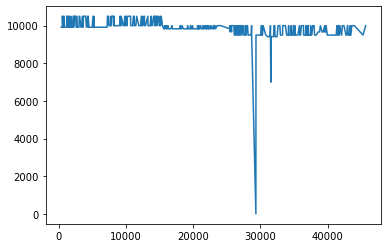

In [23]:
baskets[baskets.sku_id == 233].price.plot()

### conclusion
 - SKU 233 may be legit, but price 1 for SKU 233 is more likely an outlier

 - what about SKU 186 and 970 (rows with price 1 or 4240000)?